# Описание датасета "Used Cars Dataset"

Данный датасет содержит информацию о 762 091 подержанном автомобиле, годах выпуска, продажи, количества собственников, типах ДВС, трансмиссий, цветов кузова и салона!

## Цели анализа:

1) Определение данных;

2) Формулирование гипотез;

3) Загрузка данных в Python;

4) Проверка данных;

5) Очистка данных;

6) Преобразование данных;

7) Выбор данных для анализа;

8) Агрегирование данных;

9) Визуализация данных;

10) Подтверждение или опровержение поставленных гипотез;

11) Формулирование ограничений и выводов.

## Определение данных для анализа:

В качестве данных для анализа мной был выбран датасет «Used Cars Dataset». В данном датасете представлены данные о 762 091 подержанном автомобиле, собранном из [сайта](cars.com).

Для анализа чаще всего будем использовать следующие данные из датасета: ...

# Описание данных

##### Содержимое, которое можем увидеть в датасете:

- `manufacturer`- название производителя автомобиля
- `model`- название модели автомобиля
- `year`- год выпуска/производства автомобиля
- `mileage`- пробег - количество миль, пройденных автомобилем с момента выпуска
- `engine`- тип ДВС - автомобильный двигатель (бенз, газ, дизель, гибрид, электричка)
- `transmission`- АКПП/КПП - тип коробки переключения передач у автомобиля
- `drivetrain`- тип привода у автомобиля (передний, задний, полный)
- `fuel_type`- тип топлива, которое потребляет автомобиль
- `mpg`- запас хода - количество миль, которое автомобиль может проехать, используя один галлон топлива (мили на галлон)
- `exterior_color` - цвет кузова автомобиля
- `interior_color` - цвет салона автомобиля
- `accidents_or_damage` - попадал ли автомобиль в ДТП
- `one_owner` - принадлежал ли автомобиль одному собственнику
- `personal_use_only` - использовался ли автомобиль только в личных целях
- `seller_name` - имя продавца
- `seller_rating` - рейтинг у продавца
- `driver_rating` - рейтинг у автомобиля, данный ему водителями
- `driver_reviews_num` - количество отзывов об автомобиле, оставленных водителями
- `price_drop` - уровень снижение цены по сравнению с начальной ценой
- `price` - цена автомобиля

# Подготовка и анализ данных

In [1]:
# Подключаем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import (
    # Критерий Стьюдента
    ttest_ind,
    f_oneway,
    # Тест Манна-Уитни, для гипотез H0 и H1
    mannwhitneyu,
    f_oneway,
    pearsonr
)
from sklearn.preprocessing import LabelEncoder

In [2]:
# Получаем датасет с локального компа где он у меня расположен

# Takes the file's folder
filepath = r"C:\Users\Noname\Desktop\GB_ДЗ\Диплом\cars.csv";
  
# read the CSV file
df = pd.read_csv(filepath)
  
# print the first five rows
print(df.head())

  manufacturer            model  year   mileage  \
0        Acura  ILX Hybrid 1.5L  2013   92945.0   
1        Acura  ILX Hybrid 1.5L  2013   47645.0   
2        Acura  ILX Hybrid 1.5L  2013   53422.0   
3        Acura  ILX Hybrid 1.5L  2013  117598.0   
4        Acura  ILX Hybrid 1.5L  2013  114865.0   

                                              engine   transmission  \
0  1.5L I-4 i-VTEC variable valve control, engine...      Automatic   
1                        1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT   
2                        1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT   
3                        1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT   
4                        1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT   

          drivetrain fuel_type    mpg           exterior_color interior_color  \
0  Front-wheel Drive  Gasoline  39-38                    Black      Parchment   
1  Front-wheel Drive    Hybrid  39-38                     Gray          Ebony   
2  Front-wheel Drive   

## Изучение данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

Здесь можно заметить, что в датасете содержатся 762091 строка. А также имеются 3-и различных типа данных: `object`, `int64` и `float64`. 

В целях экономии памяти стоит преобразовать его в другие типы

Далее расмотрим содержимое датасета:

In [4]:
display(df.head())

display(df.tail())

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0
762090,Volvo,S60 T5 Premier,2015,115592.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Savile Gray Metallic,Off-Black,1.0,0.0,1.0,Plymouth Auto Sales,NaN,4.7,51.0,501.0,12999.0


Ничего особенного нет, рассмотрим следующие этапы

In [5]:
df.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


## Преобразование данных

In [6]:
# Проверим объем занимаемой памяти в Мбайтах до преобразования
print(f'Объем датасета до преобразования: {df.memory_usage(deep=True).sum() / 1024 / 1024:.3f} Мбайт')  

Объем датасета до преобразования: 561.306 Мбайт


In [7]:
original_memory = df.memory_usage(deep=True).sum()

In [8]:
# Автоматизируем
def change_type_variable(dateframe, show_print_report=False):
    for name_column in dateframe:
        if(dateframe[name_column].dtype  == 'int64'):
            dateframe[name_column] = dateframe[name_column].astype('int32')
            if(show_print_report):
                print(f'Успешно, преобразовали в другой тип INT32 колонки: {name_column}')
        if(dateframe[name_column].dtype  == 'float64'):
            dateframe[name_column] = dateframe[name_column].astype('float32')
            if(show_print_report):
                print(f'Успешно, преобразовали в другой тип FLOAT32 колонки: {name_column}')
        if(name_column in ['accidents_or_damage', 'one_owner', 'personal_use_only']):
            dateframe[name_column] = dateframe[name_column].astype(bool)
    if not(show_print_report):
        print('Успешно, преобразованы в другой тип')

In [9]:
# Преобразуем их
change_type_variable(df)

Успешно, преобразованы в другой тип


In [10]:
# Проверим объем занимаемой памяти в Мбайтах до преобразования
print(f'Объем датасета после преобразования: {df.memory_usage(deep=True).sum() / 1024 / 1024:.3f} Мбайт')  

Объем датасета после преобразования: 525.694 Мбайт


In [11]:
optimized_memory = df.memory_usage(deep=True).sum()

In [12]:
# Узнаем, сколько сэкономили памяти
savings_percentage = (original_memory - optimized_memory) / original_memory * 100
print(f"Сэкономлено {savings_percentage:.2f}% памяти")

Сэкономлено 6.34% памяти


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int32  
 3   mileage              761585 non-null  float32
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  762091 non-null  bool   
 12  one_owner            762091 non-null  bool   
 13  personal_use_only    762091 non-null  bool   
 14  seller_name          753498 non-null  object 
 15  seller_rating    

Рассмотрим теперь описательную статистику, чтобы получить представление о данных, выявить закономерности и обнаружить выбросы или аномалии.

## Данные порядковой статистики

In [14]:
df.describe()

,year,mileage,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.577872e+04,4.157495,4.622404,89.501434,1007.010742,3.649289e+04
std,5.110532,4.354995e+04,0.805877,0.277262,115.062737,1375.448853,1.984081e+06
min,1915.000000,0.000000e+00,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


Здесь стоит обратить внимание на следующие колонки:
- **Год**. Здесь мы видим что чаще всего продаются автомобили, примерно `2017 года` выпуска (данное среднее значение преобладает среди остальных). В объявлениях так же можем увидеть автомобиль даже `1915 года`. 
- **Пробег**. В объявлениях чаще всего фигурируют автомобили со средним пробегом в `5.57^4 миль`. Так же мы видим, что в продажу выставляют авто с 0 пробегом. Кроме того есть авто, пробег у которого `1,11^6 миль`!. 
- **Попадал ли автомобиль в ДТП**. Статистика говорит, что в объявлениях редко указывают, что авто попадал в ДТП.
- **Принадлежал ли автомобиль одному собственнику**. Этот столбец говорит о том, сколько у автомобиля было собственников. Если 0, то одно лицо, в противном случае было несколько собственников у авто. Как показывает статистика, в среднем мы сталкиваемся с авто, у которых было несколько собственников.
- **Использование в личных целях**. Статистика показывает, что чаще всего пользуются автомобилем в личных целях, около `65%`.
- **Рейтинг продавца**. Продавец в среднем чаще всего выставляют автомобиль с рейтингом `4.15`, а самой минимальной - `1.00`.
- **Рейтинг водителя**. Водитель в среднем чаще всего выставляют автомобиль с рейтингом `4.62`, а самой минимальной - `1.00`.
- **Количество отзывов об автомобилях, оставленных водителями**. Водитель в среднем чаще всего выставляют автомобиль с рейтингом `4.62`, а самой минимальной - `1.00`.
- **Снижение цены по сравнению с начальной ценой**. В среднем в объявлениях видно, что начинают падать на сумму в `1007 долларов`, самое большое понижение - `170995 долларов`, минимальный шаг - `100 долларов`.
- **Цена автомобиля**. В среднем мы можем увидеть в объявлениях, что продают автомобилей с `3.64^4 долларов`, а самой максимальной - `10 00 000 000 долларов`, минимальной - `1 долларов`. Наверное совсем хлам...)

##### Основываясь на эти данные, можем сделать промежуточный вывод:

В датасете содержатся широкий диапазон промежутков годов выпуска автомобилей, начиная с 1915 по 2023 года. Да в объявлениях выставляются в продажу также и раритетные автомобили, что видимо и обусловлено высокой их стоимостью. Также в объявлениях вытавляют автомобилей с большими пробегами, которые скорее всего нуждается в востановительных/технических ремонтах, не говоря уж о нескольких собственниках у таких авто. Скорее всего в объвлениях так же выставляют служебные автомобили: фургоны, пикапы, т.к. процент пользования в личных целях невысок (около 65%). Самое интересное, что продавцы оставляют отзыв по автомобилям с оценкой ниже по сравнению с отзывами водителей. Отсюда следует следющая причинно-следсвенная связь - понижение цены по сравнению с начальной стоимостью автомобилей.

## Предобработка данных

### Преобразование в численный тип

У нас есть колонка не численного типа, которого нужно преобразовать в другой тип для проверки дальнейшей гипотезы

In [15]:
df['mpg'].head()

0    39-38
1    39-38
2    39-38
3    39-38
4    39-38
Name: mpg, dtype: object

In [16]:
df['mpg'].value_counts()

19-26      16210
18-25      15751
17-25      14304
20-27      13546
16-23      11489
           ...  
23-31.0        1
29-42          1
46-41          1
47-47.0        1
19-27.5        1
Name: mpg, Length: 865, dtype: int64

In [17]:
# Разделение диапазонов mpg на две колонки
df[['mpg_city', 'mpg_highway']] = df['mpg'].str.split('-', expand=True)

# Преобразование колонок в числовой формат
# Флаг 'errors='coerce'' позволит обработать случаи, 
# когда значения не могут быть преобразованы в числа, и они будут заменены на NaN, если такие случаи есть.
df['mpg_city'] = pd.to_numeric(df['mpg_city'], errors='coerce')
df['mpg_highway'] = pd.to_numeric(df['mpg_highway'], errors='coerce')

# Удаление исходного столбца 'mpg', если нужно
df.drop('mpg', axis=1, inplace=True)

### Преобразование цветов автомобилей

In [18]:
df['exterior_color'].value_counts()

Black                         60250
White                         51104
Gray                          30210
Silver                        24280
Blue                          17450
                              ...  
Garnet Fire                       1
Athens Blue Pearl Metallic        1
Mojave Copper Metallic            1
Beryllium                         1
COL01900                          1
Name: exterior_color, Length: 7681, dtype: int64

In [19]:
df['interior_color'].value_counts()

Black                                              286298
Gray                                                49836
Jet Black                                           46090
Ebony                                               37780
Charcoal                                            26164
                                                    ...  
Monaco Red W/Black Accent                               1
Stone with Premium Leatherette Seating Surfaces         1
Havana                                                  1
Gallery White Leather                                   1
Atacama                                                 1
Name: interior_color, Length: 4679, dtype: int64

Как видим, много разных цветов, причем с разными регистрами. Исправим.

In [20]:
# Подберем список слов цветов для замены
selected_colors = ['black', 'white', 'gray', 'silver', 'red', 'green', 
                   'yellow', 'blue', 'orange', 'purple', 'brown', 'pink', 'beige', 'cyan', 'olive', 'maroon', 'navy', 'teal']

# Заменяет значения в столбце 'exterior_color' на основе ключевых слов.
def replace_keywords(df, col_name, selected_colors):
    
    # Приведение к нижнему регистру
    df[col_name] = df[col_name].str.lower()
    
    # Замена значений на основе частичного совпадения
    for color in selected_colors:
        mask = df[col_name].notna() & df[col_name].str.contains(color, case=False, na=False)
        df.loc[mask, col_name] = color

    return df

In [21]:
# Замена значений на основе ключевых слов
df = replace_keywords(df, 'exterior_color', selected_colors)
df = replace_keywords(df, 'interior_color', selected_colors)

Посмотрим, сколько уникальных значений получили в итоге

In [22]:
df['exterior_color'].value_counts()

white                     179434
black                     161249
silver                     90846
gray                       79498
blue                       67247
                           ...  
nice and clean                 1
nightfall                      1
ceramic grey clearcoat         1
08x5                           1
col01900                       1
Name: exterior_color, Length: 2333, dtype: int64

In [23]:
df['interior_color'].value_counts()

black                                    393970
gray                                      71257
ebony                                     37790
beige                                     27260
charcoal                                  26175
                                          ...  
wood                                          1
beautiful leather seats bose s                1
medium stone/med lt stone                     1
chateau w/linear dark mocha wood trim         1
atacama                                       1
Name: interior_color, Length: 1810, dtype: int64

Инвенсируем цвета автомобиля и узнаем, сколько их

In [24]:
df[~df['exterior_color'].isin(selected_colors)]['exterior_color'].value_counts()

gun metallic                           7807
granite crystal clearcoat metallic     6503
satin steel metallic                   4445
modern steel metallic                  3778
ebony twilight metallic                3423
                                       ... 
titanium bronze pearl metallic            1
desert frost firemist w/padded roof       1
flax pearl                                1
wolf grey                                 1
col01900                                  1
Name: exterior_color, Length: 2315, dtype: int64

In [25]:
df[~df['interior_color'].isin(selected_colors)]['interior_color'].value_counts()

ebony                                             37790
charcoal                                          26175
graphite                                          14558
tan                                                9596
ivory                                              4258
                                                  ...  
ebony w/cirrus headlining and ebony/lunar ip          1
cirrus w/cirrus headlining and ebony/cirrus ip        1
ebony w/cirrus headlining and ebony/cirrus ip         1
cirrus/ebony/cirrus/cirrus                            1
atacama                                               1
Name: interior_color, Length: 1793, dtype: int64

Уникальных цветов довольно много, даже имеются определенные тонкости

### Пропущенные значения

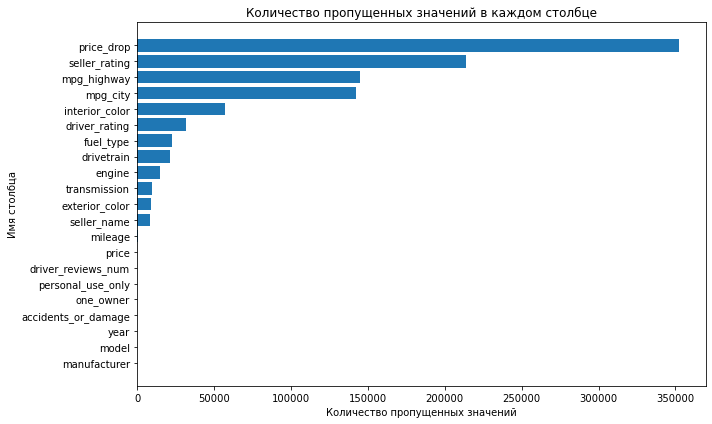

In [26]:
# Создаем список с именами столбцов и количеством пропущенных значений
columns = df.columns
missing_counts = [df[column].isnull().sum() for column in columns]

# Сортируем столбцы в порядке убывания количества пропущенных значений
sorted_columns, sorted_missing_counts = zip(*sorted(zip(columns, missing_counts), key=lambda x: x[1], reverse=False))

# Создаем горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
# Используем barh для горизонтальных столбцов
plt.barh(sorted_columns, sorted_missing_counts)  
plt.xlabel('Количество пропущенных значений')
plt.ylabel('Имя столбца')
plt.title('Количество пропущенных значений в каждом столбце')
plt.tight_layout()

# Отображаем график
plt.show()

In [27]:
df.describe()

,year,mileage,seller_rating,driver_rating,driver_reviews_num,price_drop,price,mpg_city,mpg_highway
count,762091.000000,7.615850e+05,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05,620020.000000,617161.000000
mean,2017.791398,5.577872e+04,4.157495,4.622404,89.501434,1007.010742,3.649289e+04,21.306201,27.939859
std,5.110532,4.354995e+04,0.805877,0.277262,115.062737,1375.448853,1.984081e+06,6.501691,6.942568
min,1915.000000,0.000000e+00,1.000000,1.000000,0.000000,100.000000,1.000000e+00,0.000000,0.000000
25%,2016.000000,2.328700e+04,3.800000,4.500000,14.000000,380.000000,1.958300e+04,17.000000,24.000000
50%,2019.000000,4.559600e+04,4.500000,4.700000,51.000000,642.000000,2.798900e+04,20.000000,28.000000
75%,2021.000000,7.836500e+04,4.700000,4.800000,119.000000,1007.000000,3.948800e+04,24.000000,32.000000
max,2024.000000,1.119067e+06,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09,126.000000,255.000000


Как видно присутствуют огромные пропуски в столбцах: `снижение стоимости`, `рейтинг продавца` и `кол-во миль`. Заполним пропуски медианными значениями только для численных типов, а у остальных - устраним.

Медианными значениями заполняем, потому что они менее чувствительны к выбросам.

In [28]:
columns_isnull = [col for col, count in zip(sorted_columns, sorted_missing_counts) if count > 0]
print(f'Названий столбцов, у которых пропуски:')
for col in columns_isnull:
    print('\t' + col)

Названий столбцов, у которых пропуски:
	mileage
	seller_name
	exterior_color
	transmission
	engine
	drivetrain
	fuel_type
	driver_rating
	interior_color
	mpg_city
	mpg_highway
	seller_rating
	price_drop


In [29]:
# Создадим функцию, которая будет автоматически выводить кол-во пропусков, 
# находить медианное значение, а также заполнит его
def fill_isnull_median(df, columns_isnull):
    print(f'Кол-во пропусков {df[columns_isnull].isnull().sum()}')
    print(f'Тип колонки: {df[columns_isnull].dtype}')
    if(df[columns_isnull].dtype == 'float32'):
        print(f'Медианное значение {df[columns_isnull].median()}')
        # Заполняем пропуски медианным значением
        df[columns_isnull] = df[columns_isnull].fillna(df[columns_isnull].median())
        print('Заполнен пропуск')
    else:
        df = df[~df[columns_isnull].isnull()]
        print('Устранен пропуск')
    
    return df

In [30]:
for col in columns_isnull:
    print(f'Колонка: {col}')
    df = fill_isnull_median(df, col)
    print()

Колонка: mileage
Кол-во пропусков 506
Тип колонки: float32
Медианное значение 45596.0
Заполнен пропуск

Колонка: seller_name
Кол-во пропусков 8593
Тип колонки: object
Устранен пропуск

Колонка: exterior_color
Кол-во пропусков 8859
Тип колонки: object
Устранен пропуск

Колонка: transmission
Кол-во пропусков 9585
Тип колонки: object
Устранен пропуск

Колонка: engine
Кол-во пропусков 7686
Тип колонки: object
Устранен пропуск

Колонка: drivetrain
Кол-во пропусков 8642
Тип колонки: object
Устранен пропуск

Колонка: fuel_type
Кол-во пропусков 7231
Тип колонки: object
Устранен пропуск

Колонка: driver_rating
Кол-во пропусков 28068
Тип колонки: float32
Медианное значение 4.699999809265137
Заполнен пропуск

Колонка: interior_color
Кол-во пропусков 42774
Тип колонки: object
Устранен пропуск

Колонка: mpg_city
Кол-во пропусков 98626
Тип колонки: float64
Устранен пропуск

Колонка: mpg_highway
Кол-во пропусков 2448
Тип колонки: float64
Устранен пропуск

Колонка: seller_rating
Кол-во пропусков 15254

In [31]:
# Проверим еще раз
for col in columns_isnull:
    print(f'Колонка: {col}; \t Кол-во пропусков: {df[col].isnull().sum()}')

Колонка: mileage; 	 Кол-во пропусков: 0
Колонка: seller_name; 	 Кол-во пропусков: 0
Колонка: exterior_color; 	 Кол-во пропусков: 0
Колонка: transmission; 	 Кол-во пропусков: 0
Колонка: engine; 	 Кол-во пропусков: 0
Колонка: drivetrain; 	 Кол-во пропусков: 0
Колонка: fuel_type; 	 Кол-во пропусков: 0
Колонка: driver_rating; 	 Кол-во пропусков: 0
Колонка: interior_color; 	 Кол-во пропусков: 0
Колонка: mpg_city; 	 Кол-во пропусков: 0
Колонка: mpg_highway; 	 Кол-во пропусков: 0
Колонка: seller_rating; 	 Кол-во пропусков: 0
Колонка: price_drop; 	 Кол-во пропусков: 0


### Дубликаты

In [32]:
# Кол-во дублириющие значения
df.duplicated().sum()

6177

Как видим, что присутствуют очень много дубликатов. Устраним их.

In [33]:
# Избавимся от них
df.drop_duplicates(inplace=True)

In [34]:
# Кол-во дублириющие значения
df.duplicated().sum()

0

### Удаление выбросов

Перед удалением нужно заново рассмотреть описательную статистку, чтобы выявить наличие выбросов и устранить их

###### Описательная статистка

In [35]:
df.describe()

,year,mileage,seller_rating,driver_rating,driver_reviews_num,price_drop,price,mpg_city,mpg_highway
count,561470.000000,5.614700e+05,561470.000000,561470.000000,561470.000000,561470.000000,5.614700e+05,561470.000000,561470.000000
mean,2017.866700,5.721900e+04,4.252933,4.642355,100.722908,793.441162,3.182876e+04,21.385769,28.051905
std,3.898146,4.122975e+04,0.702599,0.240043,119.753265,916.947693,1.334598e+06,6.335740,6.734419
min,1928.000000,0.000000e+00,1.000000,1.000000,0.000000,100.000000,1.000000e+00,0.000000,0.000000
25%,2016.000000,2.640300e+04,4.100000,4.600000,21.000000,500.000000,1.899800e+04,18.000000,24.000000
50%,2019.000000,4.782700e+04,4.500000,4.700000,62.000000,600.000000,2.645000e+04,20.000000,28.000000
75%,2020.000000,7.921600e+04,4.700000,4.800000,137.000000,750.000000,3.599800e+04,24.000000,32.000000
max,2023.000000,1.119067e+06,5.000000,5.000000,1025.000000,79909.000000,1.000000e+09,126.000000,255.000000


#### Стоимость автомобиля

По описательной статистке видно, что есть выброс в стоимости автомобиля. Проверим на графике.

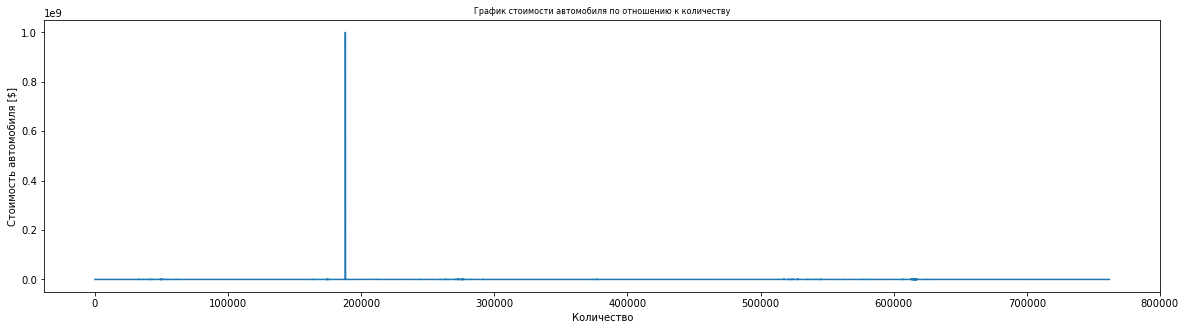

In [36]:
plt.figure(figsize=(20, 5))
plt.plot(df['price']);
plt.title('График стоимости автомобиля по отношению к количеству', fontsize=8);
plt.xlabel('Количество');
plt.ylabel('Стоимость автомобиля [$]');

Как видим - есть выброс, устраним его

In [37]:
df = df[df['price'] < df['price'].max()] 

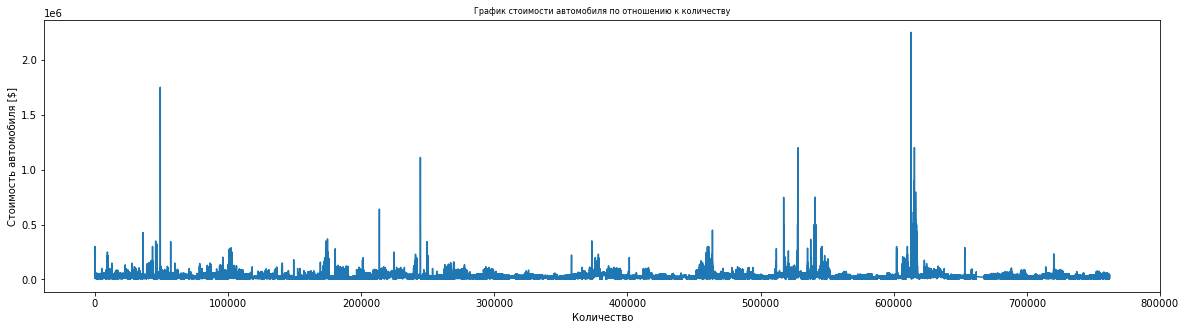

In [38]:
plt.figure(figsize=(20, 5));
plt.plot(df['price']);
plt.title('График стоимости автомобиля по отношению к количеству', fontsize=8);
plt.xlabel('Количество');
plt.ylabel('Стоимость автомобиля [$]');

График получился более читаемым

## Агрегирование данных

### Разница в продажах

Рассмотрим разницу в продажах, следуя по формуле:

$$ X_{\text{price difference}} = Y_{\text{price}} - Y_{\text{price drop}} $$

In [39]:
df['price_difference'] = df['price'] - df['price_drop']

Рассмотрим кол-во отрицательных значений

In [40]:
print('Количество:', df[df['price_difference'] < 0]['price_difference'].count())

Количество: 20


Можно сказать, что при "понижение цены" стоимости автомобиля продавцом по какой то причине произошло ее увеличение, рассмотрим ниже сортировку по возрастанию разницы стоимости.

In [41]:
df[df['price_difference'] < 0][['model', 'year', 'price_difference', 'price', 'price_drop']] \
    .sort_values(by='price_difference')

,model,year,price_difference,price,price_drop
566508,Maxima SE,2001,-2056.0,500.0,2556.0
384190,Liberty Sport,2007,-1700.0,1600.0,3300.0
425094,Sorento LX,2011,-993.0,3500.0,4493.0
660696,Legacy 2.5i Limited,2019,-599.0,1.0,600.0
5658,TLX V6 A-Spec,2018,-599.0,1.0,600.0
13850,A4 2.0T Premium,2014,-599.0,1.0,600.0
555602,Mirage ES,2017,-510.0,3995.0,4505.0
440689,Sedona LX,2008,-500.0,3500.0,4000.0
584638,Versa SV,2021,-341.0,259.0,600.0
195371,EcoSport Titanium,2019,-311.0,289.0,600.0


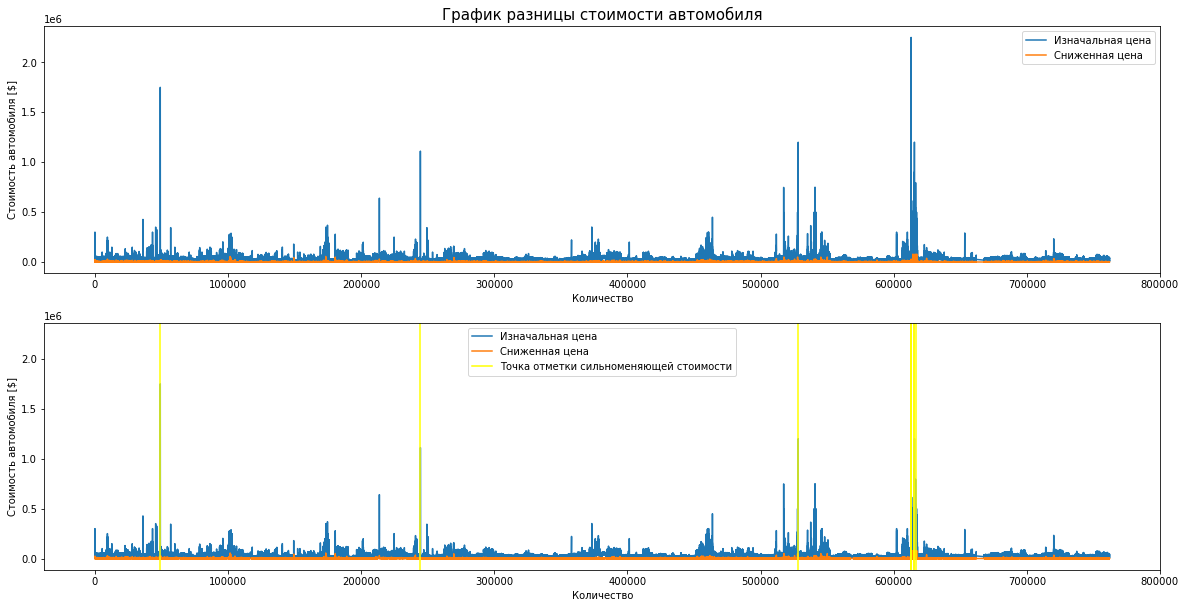

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10));

axs[0].plot(df['price']);
axs[0].plot(df['price_drop']);
axs[0].set_title('График разницы стоимости автомобиля', fontsize=15);
axs[0].set_xlabel('Количество');
axs[0].set_ylabel('Стоимость автомобиля [$]');
axs[0].legend(['Изначальная цена', 'Сниженная цена'])

axs[1].plot(df['price']);
axs[1].plot(df['price_drop']);
for max_value in df['price'].sort_values(ascending=False)[:15].index:
    axs[1].axvline(x=max_value, color='yellow');
axs[1].set_xlabel('Количество');
axs[1].set_ylabel('Стоимость автомобиля [$]');
axs[1].legend(['Изначальная цена', 'Сниженная цена', 'Точка отметки сильноменяющей стоимости']);

На этом графике можно заметить (желтые вертикальная линия), что в некоторых местах изначальная стоимость автомобиля была высокой, а затем значительно изменилась в меньшую сторону.

### Разница в рейтингах, оставленных водителями и продавцами

Рассмотрим разницу в рейтингах, следуя по формуле:

$$ X_{\text{rating difference}} = Y_{\text{driver rating}} - Y_{\text{seller rating}} $$


In [43]:
df['rating_difference'] = df['driver_rating'] - df['seller_rating']

In [44]:
print('Количество отрицательных значений:', df[df['rating_difference'] < 0]['rating_difference'].count())

Количество отрицательных значений: 132175


Рассмотрим только ТОП-10 данных с отрицательными значениями

In [45]:
df[df['rating_difference'] < 0][['model', 'year', 'rating_difference']] \
    .sort_values(by='rating_difference').head(10)

,model,year,rating_difference
40663,M760 i xDrive,2021,-3.9
281777,Savana 3500 LT,2017,-3.8
40635,M760 i xDrive,2021,-3.8
281830,Savana 3500 Work Van,2017,-3.5
279438,Savana 2500 Work Van,2020,-3.5
279655,Savana 2500 Work Van,2020,-3.5
40660,M760 i xDrive,2021,-3.5
279465,Savana 2500 Work Van,2020,-3.5
281804,Savana 3500 LS,2017,-3.5
40685,M760 i xDrive,2021,-3.5


Как и здесь видим, что по какой то причине данные рейтинга получились сильно разными. Тогда рассмотрим график.

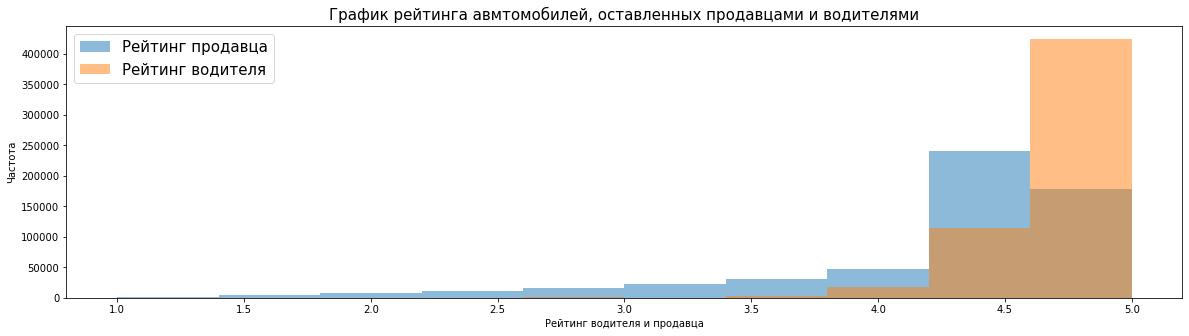

In [46]:
plt.figure(figsize=(20, 5));
plt.hist(df['seller_rating'], alpha=0.5);
plt.hist(df['driver_rating'], alpha=0.5);
plt.title('График рейтинга авмтомобилей, оставленных продавцами и водителями', fontsize=15);
plt.xlabel('Рейтинг водителя и продавца');
plt.ylabel('Частота');
plt.legend(['Рейтинг продавца', 'Рейтинг водителя'], fontsize=15);

По данным на графике видим, что существуют значимая разница в рейтинге между водителями и продавцами. Однако, стоит обратить внимание, что именно водители чаще всего оставляют высокий рейтинг нежели продавцы. 

### Количество выпускаемых моделей производителями

Рассмотрим список разных моделей, которые производители успели выпустить за промежуток в течении года

In [47]:
print('Список производителей в датасете:')
for name in df['manufacturer'].unique():
    print(name, end='; ')

Список производителей в датасете:
Acura; Audi; BMW; Buick; Cadillac; Chevrolet; Chrysler; Dodge; Ford; GMC; Honda; Hyundai; INFINITI; Jaguar; Jeep; Kia; Land Rover; Lexus; Lincoln; Mazda; Mercedes-Benz; Mitsubishi; Nissan; Porsche; RAM; Subaru; Toyota; Volkswagen; Volvo; 

In [48]:
# Группируем данные и подсчитываем частоту для каждого производителя
car_models_by_manufacturer = df.groupby(by='manufacturer').count()['model'].sort_values(ascending=True)

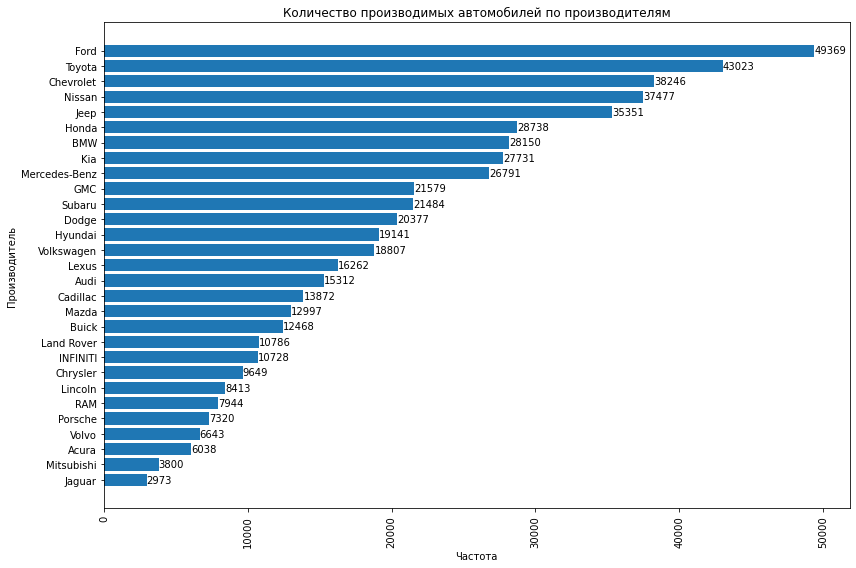

In [49]:
# Создаем график
plt.figure(figsize=(12, 8))
plt.barh(car_models_by_manufacturer.index, car_models_by_manufacturer.values)
plt.xlabel('Частота')
plt.ylabel('Производитель')
plt.title('Количество производимых автомобилей по производителям')
plt.xticks(rotation=90)
plt.tight_layout()

# Количество выпускаемых автомобилей
for index, value in enumerate(car_models_by_manufacturer.values):
    plt.text(value, index, str(value), ha='left', va='center')

# Отображаем график
plt.show()

Рассмотрим корреляционную матрицу тепловой карты после агрегировании данных

# Анализ данных

## Проверка гипотез

Рассмотрим следующие гипотезы:

- **Влияние характеристик на цену автомобиля:**
    - Гипотеза: Автомобили с более низким пробегом имеют более высокую цену.
    - Гипотеза: Автомобили с более свежими годами выпуска стоят дороже.
    - Гипотеза: Рейтинг продавца и рейтинг водителей связаны с ценой автомобиля.
    
- **Сравнение цвета кузова и цвета салона с ценой:**
	- Гипотеза: Автомобили с определенными цветами кузова и салона стоят дороже.

- **Исследование взаимосвязей между рейтингами продавца и водителей:**
	- Гипотеза: Рейтинг продавца коррелирует с рейтингом автомобиля, данным водителями.
  
- **Анализ изменения цен по годам:**
	- Гипотеза: Средняя цена на автомобили меняется с течением времени.

- **Влияние типа топлива и трансмиссии на эффективность топливопотребления (mpg):**
	- Гипотеза: Автомобили с определенным типом топлива имеют более высокую эффективность топливопотребления.
	- Гипотеза: Автомобили с определенным типом трансмиссии имеют более высокую эффективность топливопотребления.

### Влияние характеристик на цену автомобиля:

#### Гипотеза: Автомобили с более низким пробегом имеют более высокую цену.

Рассмотрим эту гипотезу и проверим

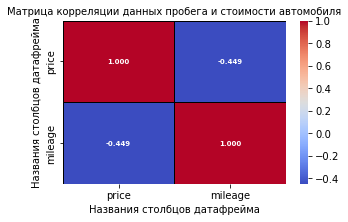

In [50]:
# Рассмотрим корреляцию тепловой карты, чтобы убедиться в них корреляционных значений

plt.figure(figsize=(5, 3))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    df[['price', 'mileage']].corr().round(3), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 7, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 10})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных пробега и стоимости автомобиля', fontdict={'size': 10});

plt.show()

В данном случае корреляция говорит, что значение получилось отрицательным, следовательно, с увеличением пробега стоимость автомобиля снижается. И в противном случае, чем дороже автомобиль, тем выше вероятность того, что у автомобиля небольшой пробег.

Попробуем применять математический метод, а именно, равенство распределений выборок тестом Манна-Уитни, чтобы выявлять, распределения равны или нет.

- H0 - распределения равны
- H1 - распределения не равны

In [51]:
statistic, pvalue = mannwhitneyu(df['price'], df['mileage'])
alpha = 0.05
print('p-value:', pvalue)

if(pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Распределения не равны')
else:
    print('Отвергаем первую гипотезу. Распределения равны')

p-value: 0.0
Отвергаем нулевую гипотезу. Распределения не равны


p-value получилось слишком маленьким или стремится к нулю. Рассмотрим критерий Стьюдента.

In [52]:
# выполнение t-теста (Критерий Стьюдента)
t, p = ttest_ind(df['price'], df['mileage'])

# вывод результатов
print("t-value = ", t)
print("p-value = ", p)

t-value =  -440.0404806891415
p-value =  0.0


В данном случае получен очень маленький p-value, что говорит о том, что различия между данными статистически значимы. Это означает, что существует значимая разница между средними значениями двух выборок и эта разница не может быть объяснена случайными факторами.

Также можно рассмотреть значение t-статистики. Если оно больше 2 или меньше -2 (при уровне значимости 0,05), то различия между выборками считаются статистически значимыми.

Подытожим, это означает, что нулевая гипотеза о равенстве распределений выборок отвергается на уровне значимости 0,05. То есть, существует статистически значимая разница между ценами и пробегом автомобилей. И подтвердим гипотезу на основе вывода корреляции тепловой карты.

#### Гипотеза: Автомобили с более свежими годами выпуска стоят дороже.

Рассмотрим эту гипотезу и проверим

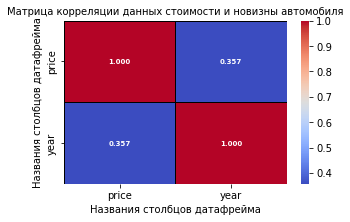

In [53]:
# Рассмотрим корреляцию тепловой карты, чтобы убедиться в них корреляционных значений

plt.figure(figsize=(5, 3))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    df[['price', 'year']].corr().round(3), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 7, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 10})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных стоимости и новизны автомобиля', fontdict={'size': 10});

plt.show()

Здесь корреляция говорит, что значение получилось слабоположительной, следовательно, с уменьшением года выпуска увеличивается и стоимости автомобиля. И в противном случае, чем старее автомобиль, тем дешевле. Рассмотрим график.

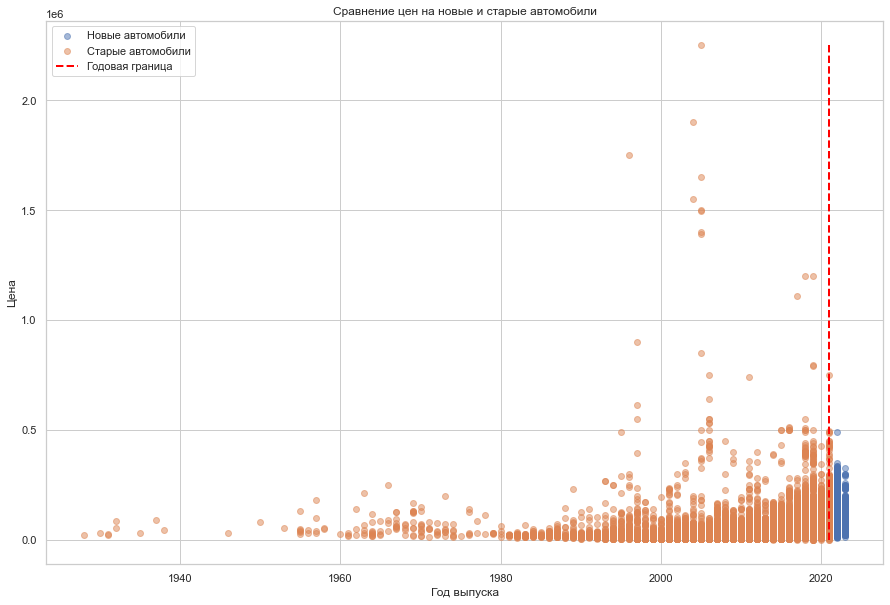

In [54]:
sb.set(style="whitegrid")

# Пусть будет 2022 год, с которого начинается "новый" автомобиль
threshold_year = 2021

df['is_new'] = df['year'] > threshold_year

# Разделим данные на две группы
new_cars = df[df['is_new']]
old_cars = df[~df['is_new']]

plt.figure(figsize=(15, 10))

# Нарисуем точки для каждой группы
plt.scatter(new_cars['year'], new_cars['price'], label='Новые автомобили', alpha=0.5)
plt.scatter(old_cars['year'], old_cars['price'], label='Старые автомобили', alpha=0.5)

# Нарисуем прямую линию, отображающую различия в ценах
plt.plot([threshold_year, threshold_year], [min(df['price']), max(df['price'])], 
         color='red', linestyle='--', linewidth=2, label='Годовая граница')

# Добавим метки осей и заголовок графика
plt.xlabel('Год выпуска')
plt.ylabel('Цена')
plt.title('Сравнение цен на новые и старые автомобили')
plt.legend()

# Отобразите график
plt.show()

Попробуем применять математический метод, а именно, равенство распределений выборок тестом "t-тест" для сравнения цен

- H0 - Нет статистически значимых различий в ценах между новыми и старыми автомобилями.
- H1 - Есть статистически значимые различия в ценах между новыми и старыми автомобилями

In [55]:
# Проведем t-тест для сравнения цен
t_stat, p_value = ttest_ind(new_cars['price'], old_cars['price'], equal_var=False)

# Получим результаты
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Вывод гипотезы
if p_value < 0.05:
    print("Есть статистически значимые различия в ценах между новыми и старыми автомобилями.")
else:
    print("Нет статистически значимых различий в ценах между новыми и старыми автомобилями.")

T-статистика: 144.35726286751046
P-значение: 0.0
Есть статистически значимые различия в ценах между новыми и старыми автомобилями.


Результат t-теста позволяет отвергнуть нулевую гипотезу о том, что нет статистически значимых различий в ценах между новыми и старыми автомобилями. P-значение равно 0.0, что гораздо меньше уровня значимости 0.05.

Таким образом, на основе проведенного t-теста можно сделать вывод, что существует статистически значимая разница в ценах между автомобилями нового и старого года выпуска. Поскольку T-статистика положительна, это также указывает на то, что средние цены у новых автомобилей выше, чем у старых.

Однако, несмотря на статистическую значимость, важно помнить, что корреляция не означает причинно-следственной связи, и другие факторы также могут влиять на цены автомобилей.

#### Гипотеза: Рейтинг продавцов и рейтинг водителей связаны с ценой автомобиля.

Рассмотрим эту гипотезу и проверим

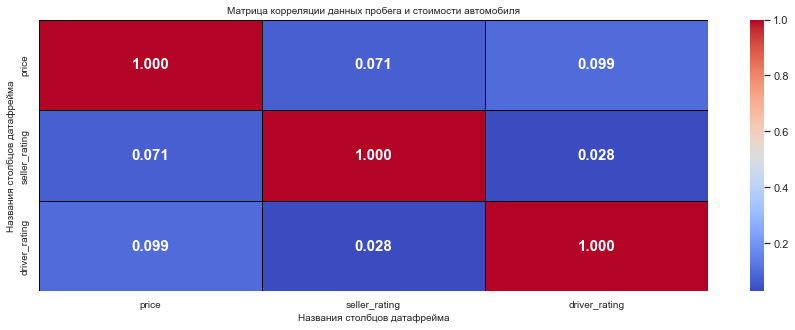

In [56]:
# Рассмотрим корреляцию тепловой карты, чтобы убедиться в них корреляционных значений

plt.figure(figsize=(15, 5))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    df[['price', 'seller_rating', 'driver_rating']].corr().round(3), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 15, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 10})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных пробега и стоимости автомобиля', fontdict={'size': 10});

plt.show()

In [57]:
print(f"Корреляция между ценой автомобиля и рейтингом продавца: {df[['price', 'seller_rating']].corr().iloc[0, 1]:.3f}")
print(f"Корреляция между ценой автомобиля и рейтингом водителя: {df[['price', 'driver_rating']].corr().iloc[0, 1]:.3f}")

Корреляция между ценой автомобиля и рейтингом продавца: 0.071
Корреляция между ценой автомобиля и рейтингом водителя: 0.099


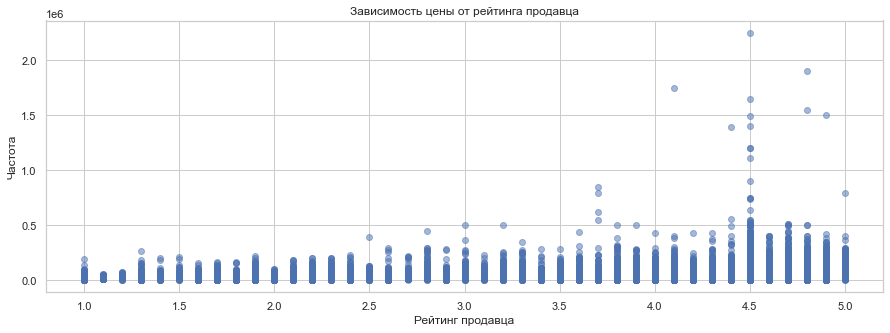

In [58]:
# Создадим график для рейтинга продавца
plt.figure(figsize=(15, 5))
plt.scatter(df['seller_rating'], df['price'], alpha=0.5)
plt.title('Зависимость цены от рейтинга продавца')
plt.xlabel('Рейтинг продавца')
plt.ylabel('Частота')
plt.show()

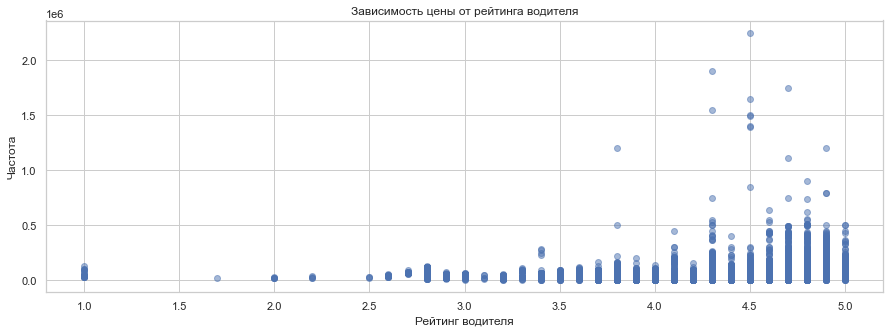

In [59]:
# Создадмс график для рейтинга водителя
plt.figure(figsize=(15, 5))
plt.scatter(df['driver_rating'], df['price'], alpha=0.5)
plt.title('Зависимость цены от рейтинга водителя')
plt.xlabel('Рейтинг водителя')
plt.ylabel('Частота')
plt.show()

Как видим, что корреляция получилась слабоположительной, следовательно, присутствует незначительный рост со стоимостью автомобиля и с рейтингом продавца. Например, если продавцу понравилась эта машина, значит возможно будет продавать его чуть подороже.

###  Сравнение цвета кузова и цвета салона с ценой:
#### Гипотеза: Автомобили с определенными цветами салона стоят дороже.

Поскольку нам известно, что слова - это не численный тип, поэтому сделать матрицу тепловой карты невозможно. На эту помощь придет декодирование признаков - `get_dummies`, который будет заменять слова на уникальный номер.

In [60]:
# Выберем данные для анализа корреляции тепловой карты
selected_data = df[df['exterior_color'].isin(selected_colors)]
display(selected_data['exterior_color'].value_counts())
print('Количество цветов:', len(selected_data['exterior_color'].value_counts()))

white     123606
black     122861
silver     70371
gray       59341
blue       50609
red        42335
green       4930
orange      2695
brown       2424
yellow      1291
beige        815
maroon       719
purple       241
teal         118
olive         87
navy          17
pink          13
Name: exterior_color, dtype: int64

Количество цветов: 17


In [61]:
# Создание копии данных для безопасной модификации
encoded_data = selected_data.copy()

# Создание фиктивных переменных для 'exterior_color'
color_dummies = pd.get_dummies(encoded_data['exterior_color'], prefix='exterior_color')

# Соединение фиктивных переменных с основными данными
encoded_data = pd.concat([encoded_data, color_dummies], axis=1)

# Построение тепловой карты корреляции
correlation_matrix = encoded_data.corr()[['price']].loc[color_dummies.columns]

# Удаление префикса "exterior_color_" из названий столбцов
color_dummies.columns = [col.replace('exterior_color_', '') for col in color_dummies.columns]
# И для матрицы
correlation_matrix.columns = [col.replace('exterior_color_', '') for col in correlation_matrix.columns]
# Удаление префикса "exterior_color_" из индексов транспонированной матрицы
correlation_matrix = correlation_matrix.rename(columns=lambda x: x.replace('exterior_color_', ''), 
                                               index=lambda x: x.replace('exterior_color_', ''))

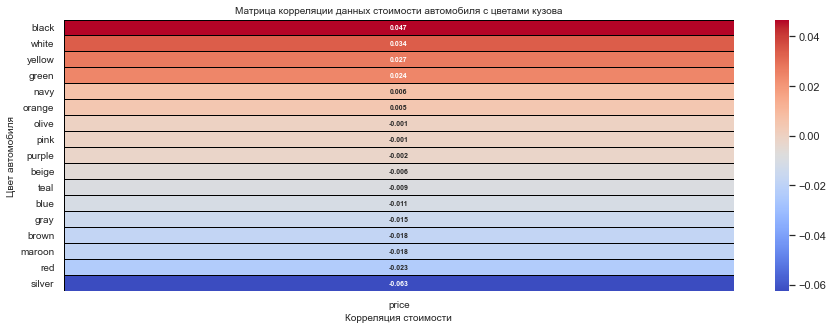

In [62]:
# Рассмотрим корреляцию тепловой карты, чтобы убедиться в них корреляционных значений
plt.figure(figsize=(15, 5))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    correlation_matrix.sort_values(by='price', ascending=False), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 7, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black'
)

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Цвет автомобиля', fontdict={'size': 10})
heatmap.set_xlabel('Корреляция стоимости', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных стоимости автомобиля с цветами кузова', fontdict={'size': 10});

plt.show()

У нас получились 2 корреляции:

- **Положительная корреляция**:

Black (черный), Green (зеленый), White (белый), Yellow (желтый) - эти цвета интерьера имеют положительную корреляцию со стоимостью автомобиля, что может означать, что автомобили с этими цветами интерьера могут стоить дороже.

- **Отрицательная корреляция**:

Silver (серебристый), Red (красный), Gray (серый), Blue (синий) - эти цвета интерьера имеют отрицательную корреляцию со стоимостью автомобиля. Возможно, автомобили с этими цветами интерьера могут быть более доступными или иметь более низкую стоимость.

Рассмотрим нулевую и альтернативную гипотезу.

- **H0 (нулевая гипотеза):** Существует статистически значимая разница в стоимости автомобилей в зависимости от цвета кузова и цвета салона.

- **H1 (альтернативная гипотеза):** Не существует статистически значимой разницы в стоимости автомобилей в зависимости от цвета кузова и цвета салона.

In [63]:
# Пусть будут два цвета для сравнения
color1 = 'black'
color2 = 'white'

# Тогда создадим подвыборки для каждого цвета
subset_color1 = df[df['exterior_color'] == color1]['price']
subset_color2 = df[df['exterior_color'] == color2]['price']

# Проведем t-тест
t_statistic, p_value = ttest_ind(subset_color1, subset_color2, equal_var=False)

# Уровень значимости
alpha = 0.05
print('p_value:', round(p_value, 5))

# Вывод результата теста
if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу. Существует статистически значимая разница в стоимости между цветами {color1} и {color2}.")
else:
    print(f"Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в стоимости между цветами {color1} и {color2}.")

p_value: 0.0
Отвергаем нулевую гипотезу. Существует статистически значимая разница в стоимости между цветами black и white.


Так как P-значение меньше общепринятого уровня значимости, мы отвергаем нулевую гипотезу (H0). Это говорит о том, что существует статистически значимая разница в стоимости между автомобилями с черным и белым цветами кузова. Таким образом, можно сделать вывод о том, что цвет кузова влияет на цену автомобиля.

#### Гипотеза: Автомобили с определенными цветами кузова стоят дороже.

In [64]:
# Выберем данные для анализа корреляции тепловой карты
selected_data = df[df['interior_color'].isin(selected_colors)]
display(selected_data['interior_color'].value_counts())
print('Количество цветов:', len(selected_data['interior_color'].value_counts()))

black     311881
gray       55649
beige      22167
brown       8273
red         6853
white       2255
blue         864
silver       558
navy         350
orange       227
green         74
maroon        40
yellow        21
olive         15
teal           5
pink           2
purple         2
Name: interior_color, dtype: int64

Количество цветов: 17


In [65]:
# Создание копии данных для безопасной модификации
encoded_data = selected_data.copy()

# Создание фиктивных переменных для 'exterior_color'
color_dummies = pd.get_dummies(encoded_data['interior_color'], prefix='interior_color')

# Соединение фиктивных переменных с основными данными
encoded_data = pd.concat([encoded_data, color_dummies], axis=1)

# Построение тепловой карты корреляции
correlation_matrix = encoded_data.corr()[['price']].loc[color_dummies.columns]

# Удаление префикса "exterior_color_" из названий столбцов
color_dummies.columns = [col.replace('interior_color_', '') for col in color_dummies.columns]
# И для матрицы
correlation_matrix.columns = [col.replace('interior_color_', '') for col in correlation_matrix.columns]
# Удаление префикса "exterior_color_" из индексов транспонированной матрицы
correlation_matrix = correlation_matrix.rename(columns=lambda x: x.replace('interior_color_', ''), 
                                               index=lambda x: x.replace('interior_color_', ''))

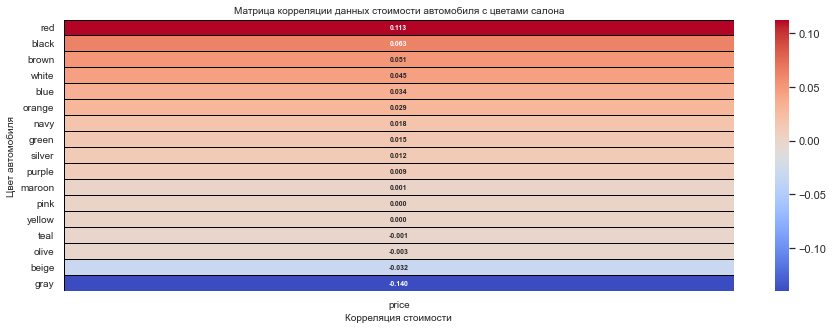

In [66]:
# Рассмотрим корреляцию тепловой карты, чтобы убедиться в них корреляционных значений
plt.figure(figsize=(15, 5))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    correlation_matrix.sort_values(by='price', ascending=False), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 7, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black'
)

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Цвет автомобиля', fontdict={'size': 10})
heatmap.set_xlabel('Корреляция стоимости', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных стоимости автомобиля с цветами салона', fontdict={'size': 10});

plt.show()

Исходя из результатов анализа, можно сделать следующие выводы:

- **Цвет салона влияет на стоимость автомобиля:** Наблюдаются статистически значимые различия в стоимости автомобилей в зависимости от цвета салона. Например, автомобили с серым цветом салона имеют существенно более низкую стоимость, чем с автомобилями с черным, белым или красным цветами салона.

- **Наибольшее влияние оказывают цвета с черной и красной обивкой:** Автомобили с черным и красным цветами салона имеют более высокие цены по сравнению с другими цветами салона. Это может быть связано с предпочтениями покупателей или особенностями рынка.

- **Стоимость может зависеть от индивидуальных предпочтений покупателей:** Например, автомобили с бежевым, белым и синим цветами салона также могут иметь более высокую цену, чем автомобили с серым или оливковым цветами.

Рассмотрим нулевую и альтернативную гипотезу.

- **H0 (нулевая гипотеза):** Средние стоимости автомобилей для разных цветов кузова равны.

- **H1 (альтернативная гипотеза):** Существует статистически значимая разница в средних стоимостях автомобилей для разных цветов кузова.

In [67]:
# Подготовка данных
color_groups = [selected_data[selected_data['interior_color'] == color]['price'] for color in selected_colors]

# Проведение теста ANOVA
f_statistic, p_value = f_oneway(*color_groups)

# Вывод результатов
print(f'p_value: {p_value}')

# Оценка статистической значимости
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Существует статистически значимая разница в стоимости между разными цветами кузова.')
else:
    print('Не удалось отвергнуть нулевую гипотезу. Нет статистически значимой разницы в стоимости между цветами кузова.')

p_value: nan
Не удалось отвергнуть нулевую гипотезу. Нет статистически значимой разницы в стоимости между цветами кузова.


C:\Users\Noname\anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


Так как P-значение меньше общепринятого уровня значимости, мы отвергаем нулевую гипотезу (H0). Странно, но можно предположить, что в данном случае у нас нет достаточных данных для выявления статистически значимых различий в средних стоимостях автомобилей для разных цветов салона. Рассмотрим еще другую гипотезу.

In [68]:
# Пусть будут два цвета для сравнения
color1 = 'red'
color2 = 'white'

# Тогда создадим подвыборки для каждого цвета
subset_color1 = df[df['interior_color'] == color1]['price']
subset_color2 = df[df['interior_color'] == color2]['price']

# Проведем t-тест
t_statistic, p_value = ttest_ind(subset_color1, subset_color2, equal_var=False)

# Уровень значимости
alpha = 0.05
print('p_value:', round(p_value, 5))

# Вывод результата теста
if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу. Существует статистически значимая разница в стоимости между цветами {color1} и {color2}.")
else:
    print(f"Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в стоимости между цветами {color1} и {color2}.")

p_value: 0.0
Отвергаем нулевую гипотезу. Существует статистически значимая разница в стоимости между цветами red и white.


Так как P-значение меньше общепринятого уровня значимости, мы отвергаем нулевую гипотезу (H0). Это говорит о том, что существует статистически значимая разница в средних стоимостях автомобилей для разных цветов кузова. Таким образом, можно сделать вывод о том, что цвет салона влияет на цену автомобиля.

###  Исследование взаимосвязей между рейтингами продавцов и водителей:
#### Гипотеза: Рейтинг продавцов коррелирует с рейтингом автомобиля, данным им водителями.

Рассмотрим гипотезу

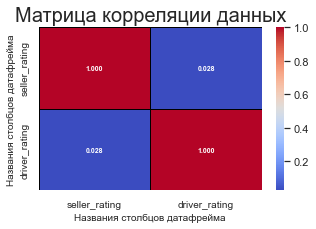

In [69]:
plt.figure(figsize=(5, 3))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    df[['seller_rating', 'driver_rating']].corr().round(3), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 7, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 10})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных', fontdict={'size': 20});

plt.show()

Корреляция получилась слабоположительной, рассмотрим далее.

Проверим гипотезу, выбрав тип топлива бензина и гибрид.

- **Нулевая гипотеза (H0):** Рейтинг продавцов не коррелирует с рейтингом водителей

- **Альтернативная гипотеза (H1):** Рейтинг продавцов коррелирует с рейтингом водителей.

In [70]:
# Для проверки этой гипотезы, можно использовать, например, коэффициент корреляции Пирсона или Спирмена.

# Проверка корреляции между рейтингами продавца и водителей
seller_driver_correlation, seller_driver_p_value = pearsonr(df['seller_rating'], df['driver_rating'])

# Вывод результатов
print("Корреляция между рейтингами продавца и водителей:", seller_driver_correlation)
print("P-value:", seller_driver_p_value)

# Вывод результата теста
alpha = 0.05
if seller_driver_p_value < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимая корреляция между рейтингами продавцов и водителей.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимой корреляции между рейтингами продавцов и водителей.")

Корреляция между рейтингами продавца и водителей: 0.027884124477295515
P-value: 5.591135862711187e-97
Отвергаем нулевую гипотезу. Существует статистически значимая корреляция между рейтингами продавцов и водителей.


Результаты статистического теста свидетельствуют о том, что существует статистически значимая корреляция между рейтингами продавцов и водителей.

###  Анализ изменения стоимости по годам:
#### Гипотеза: Средняя стоимость на автомобили меняется с течением времени.

Рассмотрим гипотезу

AttributeError: 'Line2D' object has no property 'errorbar'

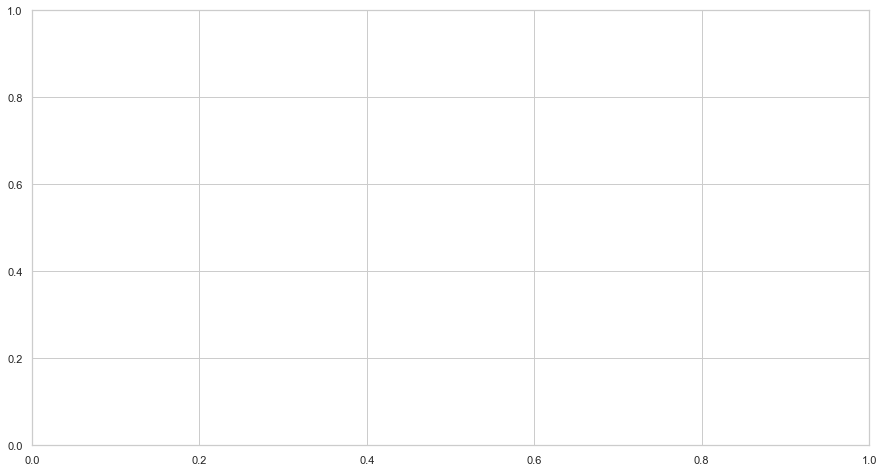

In [72]:
# Создаем линейный график для отслеживания изменения средней цены по годам с скользящим средним
plt.figure(figsize=(15, 8))

# Считаем скользящее среднее
rolling_avg = df.groupby('year')['price'].mean().rolling(window=3).mean()

# Создаем линейный график
sb.lineplot(x='year', y='price', data=df, marker='o', color='b', label='Средняя цена', errorbar=None)
sb.lineplot(x=rolling_avg.index, y=rolling_avg.values, color='r', label='Скользящее среднее')

plt.title('Изменение средней цены на автомобили по годам со скользящим средним')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена')
plt.legend()
plt.show()

По графику видно, что раритетные автомобили более дорогие, а самым дешевым оказались автомобили с промежутком между 2000 по 2010 года. Проверим гипотезу математическим способом.

Проверим гипотезу, выбрав тип топлива бензина и гибрид.

- **Нулевая гипотеза (H0):** Существует статистически значимое изменение средней стоимости на автомобили с течением времени.

- **Альтернативная гипотеза (H1):** Нет статистически значимого изменения средней стоимости на автомобили с течением времени.

In [73]:
# Разбиваем данные по годам
years = df['year'].unique()
yearly_prices = [df[df['year'] == year]['price'] for year in years]

# Проведем однофакторный дисперсионный анализ
f_statistic, p_value = f_oneway(*yearly_prices)

# Уровень значимости
alpha = 0.05
print('P-value:', round(p_value, 5))

# Вывод результата теста
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимое изменение средней стоимости на автомобили с течением времени.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимого изменения средней стоимости на автомобили с течением времени.")

P-value: 0.0
Отвергаем нулевую гипотезу. Существует статистически значимое изменение средней стоимости на автомобили с течением времени.


Проверим гипотезу, выбрав тип топлива бензина и гибрид.

- **Нулевая гипотеза (H0):** Существует статистически значимое изменение средней стоимомти на автомобили с течением времени.

- **Альтернативная гипотеза (H1):** Нет статистически значимого изменения средней стоимости на автомобили с течением времени.

Результаты теста показали, что существует статистически значимое изменение средней стоимости на автомобили с течением времени.

###  Влияние типа топлива и трансмиссии на эффективность топливопотребления (mpg):
#### Гипотеза: Автомобили с определенным типом топлива имеют более высокую эффективность топливопотребления.

Рассмотрим эту гипотезу и проверим. Но сначала рассмотрим, какие типы топлива популярны в Америке

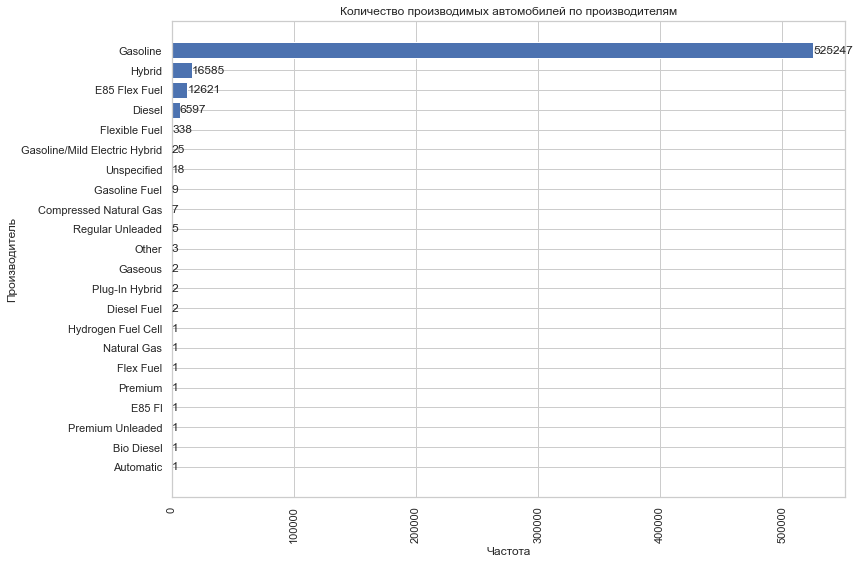

In [74]:
# Группируем данные и подсчитываем частоту для каждого производителя
car_different_fuel_type = df.groupby(by='fuel_type').count()['model'].sort_values(ascending=True)

# Создаем график
plt.figure(figsize=(12, 8))
plt.barh(car_different_fuel_type.index, car_different_fuel_type.values)
plt.xlabel('Частота')
plt.ylabel('Производитель')
plt.title('Количество производимых автомобилей по производителям')
plt.xticks(rotation=90)
plt.tight_layout()

# Количество выпускаемых автомобилей
for index, value in enumerate(car_different_fuel_type.values):
    plt.text(value, index, str(value), ha='left', va='center')

# Отображаем график
plt.show()

Как и видим, что в Америке популярный тип топлива - **бензин**. Второе место занимает - **гибрид**. А дальше уже смешанный тип топлива и дизель.

Проверим гипотезу, выбрав тип топлива бензина и гибрид.

- **Нулевая гипотеза (H0):** Средние значения mpg в группах (типах топлива) равны, то есть нет статистически значимой разницы между типами топлива в отношении эффективности топливопотребления.

- **Альтернативная гипотеза (H1):** Средние значения mpg в группах (типах топлива) различаются статистически значимо, что подразумевает, что существует влияние типа топлива на эффективность топливопотребления.

Чем больше значение F-статистики, тем более вероятно, что существует статистически значимая разница между группами

In [75]:
# Проведение однофакторного ANOVA теста
f_statistic, p_value = f_oneway(df[df['fuel_type'] == 'Gasoline']['mpg_city'], 
                                df[df['fuel_type'] == 'Hybrid']['mpg_city'])

# Вывод результатов
print("\nРезультаты однофакторного ANOVA теста в городских условиях:")
print("F-статистика:", f_statistic)
print("p-значение:", p_value)


Результаты однофакторного ANOVA теста в городских условиях:
F-статистика: 276185.89465242816
p-значение: 0.0


In [76]:
# Проведение однофакторного ANOVA теста
f_statistic, p_value = f_oneway(df[df['fuel_type'] == 'Gasoline']['mpg_highway'], 
                                df[df['fuel_type'] == 'Hybrid']['mpg_highway'])

# Вывод результатов
print("\nРезультаты однофакторного ANOVA теста в шоссейных условиях:")
print("F-статистика:", f_statistic)
print("p-значение:", p_value)


Результаты однофакторного ANOVA теста в шоссейных условиях:
F-статистика: 62858.48615930477
p-значение: 0.0


Результаты теста показали, что средние значения mpg_city для бензиновых и гибридных автомобилей различаются статистически значимо, что подтверждает альтернативную гипотезу и опровергает нулевую гипотезу.

#### Гипотеза: Автомобили с определенным типом трансмиссии имеют более высокую эффективность топливопотребления.

In [77]:
print('Кол-во уникальных значений:', len(df['transmission'].unique()))

Кол-во уникальных значений: 816


Уникальных значений очень много, поэтому рассмотрим их до ТОП-25 мест.

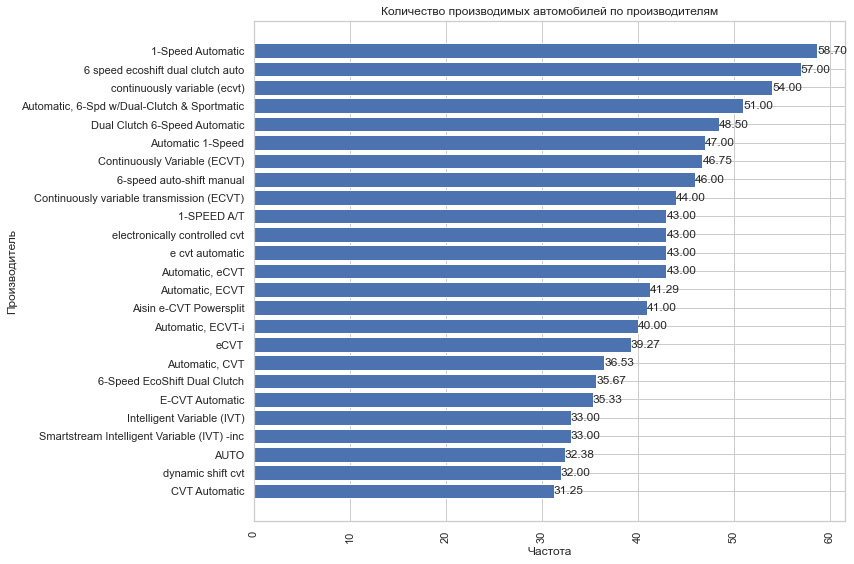

In [78]:
# Группировка данных по типу трансмиссии и вычисление среднего значения mpg
transmission_grouped_city = df.groupby('transmission')['mpg_city'].mean().sort_values(ascending=True)

# Ограничение количества баров до 25
transmission_grouped_city = transmission_grouped_city.tail(25)

# Создаем график
plt.figure(figsize=(12, 8))
plt.barh(transmission_grouped_city.index, transmission_grouped_city.values)
plt.xlabel('Частота')
plt.ylabel('Производитель')
plt.title('Количество производимых автомобилей по производителям')
plt.xticks(rotation=90)
plt.tight_layout()

# Количество выпускаемых автомобилей
for index, value in enumerate(transmission_grouped_city.values):
    plt.text(value, index, str(f'{value:.2f}'), ha='left', va='center')

# Отображаем график
plt.show()

- **Нулевая гипотеза (H0):** Средние значения эффективности топливопотребления (mpg) одинаковы для всех типов трансмиссии. То есть, нет статистически значимой разницы в mpg между автомобилями с разными типами трансмиссии.

- **Альтернативная гипотеза (H1):** Средние значения эффективности топливопотребления (mpg) различаются для по меньшей мере двух типов трансмиссии. То есть, существует статистически значимая разница в mpg между какими-то из типов трансмиссии.

In [79]:
# Проведение однофакторного ANOVA теста
transmission_types = df['transmission'].unique()
groups = [df[df['transmission'] == transmission_type]['mpg_city'] for transmission_type in transmission_types]
f_statistic, p_value = f_oneway(*groups)

# Вывод результатов
print("Средние значения mpg по типам трансмиссии:")
print(transmission_grouped_city)
print("\nРезультаты однофакторного ANOVA теста:")
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

Средние значения mpg по типам трансмиссии:
transmission
CVT Automatic                                  31.250000
dynamic shift cvt                              32.000000
AUTO                                           32.375000
Smartstream Intelligent Variable (IVT) -inc    33.000000
Intelligent Variable (IVT)                     33.000000
E-CVT Automatic                                35.333333
6-Speed EcoShift Dual Clutch                   35.666667
Automatic, CVT                                 36.534483
eCVT                                           39.272727
Automatic, ECVT-i                              40.000000
Aisin e-CVT Powersplit                         41.000000
Automatic, ECVT                                41.285714
Automatic, eCVT                                43.000000
e cvt automatic                                43.000000
electronically controlled cvt                  43.000000
1-SPEED A/T                                    43.000000
Continuously variable transmissi

- **F-статистика: `341.08650483653787`** - это высокое значение F-статистики, которое указывает на статистически значимую разницу в средних значениях mpg_city между разными типами трансмиссии. В данном случае, высокое значение F-статистики говорит о том, что существует статистически значимая разница в эффективности топливопотребления в зависимости от типа трансмиссии.

- **p-значение: `0.0`** - нулевое p-значение означает, что вероятность получить такие или более экстремальные результаты, как в ваших данных, при условии, что нулевая гипотеза (отсутствие разницы в средних значениях) верна, крайне низка. Это говорит о том, что разница в mpg_city между разными типами трансмиссии статистически значима.

Интерпретация:

Исходя из результатов ANOVA теста, у вас есть статистически значимые доказательства в пользу того, что средние значения эффективности топливопотребления (mpg_city) различаются для по меньшей мере двух типов трансмиссии. Таким образом, гипотеза о влиянии типа трансмиссии на эффективность топливопотребления подтверждена, и средняя эффективность топливопотребления различается в зависимости от типа трансмиссии.

## Корреляционная матрица тепловой карты

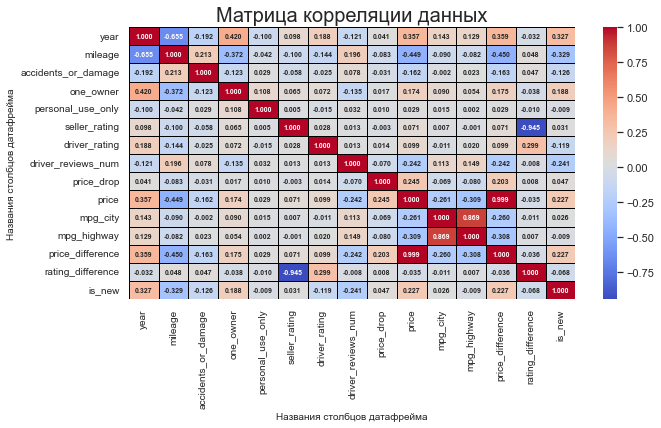

In [80]:
plt.figure(figsize=(10, 5))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    df.corr().round(3), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 7, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 10})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных', fontdict={'size': 20});

plt.show()

Давайте условно назовем сильную корреляцию, когда значение превышает `0.5` / `-0.5`. 

Здесь в большинствах случаях корреляция равна нулю или слабо положительная / отрицательная.

Есть то, что стоит обратить внимание на очевидные вещи:

- **Год выпуска и Пробег:** Присутствует средняя отрицательная корреляция между годом выпуска автомобиля и его пробегом, что логично, так как новые автомобили обычно имеют меньший пробег.

- **Год выпуска и Цена:** Наблюдается положительная корреляция между годом выпуска и ценой. Это также ожидаемо, поскольку новые автомобили, как правило, дороже.

- **Пробег и Цена:** Существует отрицательная корреляция между пробегом и ценой, что подтверждает интуитивное представление: чем меньше пробег, тем выше цена.

- **Оценка продавца и Цена:** Отмечается слабая положительная корреляция между оценкой продавца и ценой. Такие автомобили, вероятно, более дорогие.

- **Оценка водителя и Цена:** Слабая положительная корреляция между оценкой водителя и ценой. Автомобили с более высокими оценками водителей, вероятно, также более дорогие.

- **Число отзывов водителей и Цена:** Отсутствует значительная корреляция между числом отзывов водителей и ценой.

- **Рейтинг продавца и Рейтинг водителя:** Существует слабая положительная корреляция между рейтингами продавца и водителя. Это может свидетельствовать о том, что продавцы и водители оценивают автомобили схожим образом.

- **Разница в рейтинге и Цена:** Отсутствует значительная корреляция между разницей в рейтинге и ценой.

- **Новизна автомобиля и Цена:** Присутствует положительная корреляция между новизной автомобиля и его ценой.

## Итог

### Предобработка данных

Перед анализом было оптимизированно использование памяти путем преобразования данных к более корректным типам. Также были добавлены необходимые столбцы при помощи агрегирования данных, что в дальнейшем нам облегчили провести исследование и подтвердить гипотезу, а также получить ценные знания в предметной области «Used Cars Dataset».

### Анализ данных

В ходе анализа было выявлено:

- Самым дешевым автомобилем будет только тот, пробег у которого будет больше всего;

- Существует высокая вероятность того, что автомобиль свежего года выпуска при этом будет стоить дешевле.

- Не исключено, что продавец и покупатель, оставленные высокий рейтинг автомобиля, будут продавать дороже.

- Самый распространенный цвет кузова автомобиля – черный, белый и желтый. Менее популярный – серебристый, красный и бордовый.

- Самый распространенный цвет салона автомобиля – красный, черный и коричневый. Менее популярный – серый, бежевый и оливковый.

- Есть слабая положительная корреляция между оценками водителей и продавцами.

- Средняя цена автомобиля меняется в течение года его выпуска.

- Существует и самый предпочитаемый тип топлива – бензин, энергоэффективность которого превосходит другие типы топлива.

- Автомобиль с автоматической коробкой переключении передачи расходует намного меньше топлива по отношению к автомобилям, у которых механическая коробка переключения передачи.
